In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
netflix = pd.read_csv("../data/netflix_cleandata.csv", index_col=0)
country_hotencoded = pd.read_csv("../data/country_hotencoded.csv", index_col=0)
genre_hotencoded = pd.read_csv("../data/genre_hotencoded.csv", index_col=0)

### Plots

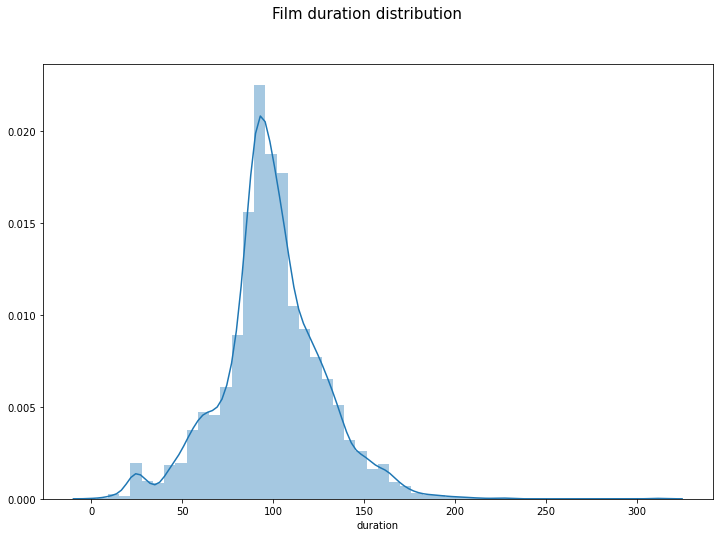

In [3]:
# Isolating Movie from types
netflix_films = netflix[netflix["type"] == "Movie"]

# Converting it to str for removing the " min" and have only integers
netflix_minutes = netflix_films["duration"].str.replace(" min", "")

# Creation of the Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

fig.suptitle("Film duration distribution", size=15)

sns.distplot(netflix_minutes)

plt.show()

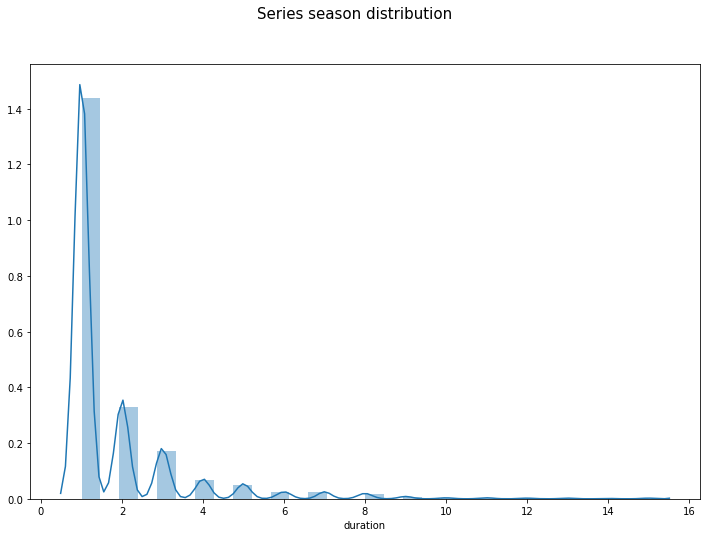

In [4]:
# Isolating TV Shows from types
netflix_tvshow = netflix[netflix["type"] == "TV Show"]

# Converting it to str for removing the " min" and have only integers
netflix_n_seasons = netflix_tvshow["duration"].str.replace(r" Season.*", "")

# Creation of the Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

fig.suptitle("Series season distribution", size=15)

sns.distplot(netflix_n_seasons, bins=30)

plt.show()

In [12]:
netflix[(netflix["country"] == "India") & (netflix["type"] == "Movie")]

,type,title,director,cast,country,date_added,rating,duration,listed_in,year_added,Netflix,Hulu,Prime Video,Disney+,correct_release_year,IMDb_rate,IMDb_votes
35,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,2019-09,TV-MA,125 min,"Dramas, International Movies, Thrillers",2019.0,1.0,0.0,0.0,0.0,2019,8.2,22.0
37,Movie,Ee Nagaraniki Emaindi,Tharun Bhascker,"Vishwaksen Naidu, Sushanth Reddy, Abhinav Goma...",India,2019-09,TV-14,133 min,"Comedies, International Movies",2019.0,1.0,0.0,0.0,0.0,2018,7.9,1.0
41,Movie,PK,Rajkumar Hirani,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",India,2018-09,TV-14,146 min,"Comedies, Dramas, International Movies",2018.0,1.0,0.0,0.0,0.0,2014,8.1,159.0
58,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,2019-09,TV-14,93 min,"Comedies, Dramas, International Movies",2019.0,1.0,0.0,0.0,0.0,2019,5.2,253.0
111,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,2019-09,TV-14,133 min,"International Movies, Romantic Movies",2019.0,1.0,0.0,0.0,0.0,2019,5.8,749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,Movie,Celluloid Man,Shivendra Singh Dungarpur,P.K. Nair,India,2017-04,TV-PG,156 min,"Documentaries, International Movies",2017.0,NaN,NaN,NaN,NaN,2012,7.9,128.0
5572,Movie,Elaan,K. Ramanlal,"Vinod Mehra, Rekha, Vinod Khanna, Helen, Madan...",India,2017-04,TV-PG,143 min,"Action & Adventure, Cult Movies, International...",2017.0,1.0,0.0,1.0,0.0,1971,NaN,NaN
5577,Movie,Killa,Avinash Arun,"Amruta Subhash, Archit Deodhar, Parth Bhalerao...",India,2017-04,TV-14,107 min,"Dramas, International Movies",2017.0,NaN,NaN,NaN,NaN,2014,7.9,1.0
5583,Movie,Salaakhen,A. Salaam,"Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud...",India,2017-04,TV-14,134 min,"Action & Adventure, International Movies, Musi...",2017.0,1.0,0.0,0.0,0.0,1975,NaN,NaN


NOT FINISHED, STILL MISSING TWO HYPOTHESIS THAT I WOULD LIKE TO WORK MORE ON IT

### Hypothesis Testing

#### 1st Hypothesis

H0 = There is correlation between the content of different countries.

H1 = There is no correlation

Use the `stats.chi2_contigency` from **SciPy** on the *country_hotencoded* DataFrame

In [154]:
country_hotencoded

,Action & Adventure,Children & Family Movies,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Horror Movies,...,TV Action & Adventure,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Stand-Up Comedy & Talk Shows,Anime Series,Classic & Cult TV,Korean TV Shows,Anime Features,TV Shows
Argentina,3,2,1,10,4,1,6,1,27,3,...,0,0,0,0,0,0,0,0,0,0
Australia,10,16,3,14,9,1,14,9,29,3,...,1,1,2,2,0,0,0,0,0,0
Austria,0,0,0,0,0,0,3,0,5,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,9,4,0,13,8,1,5,0,33,4,...,1,1,1,0,0,0,0,0,0,0
Brazil,3,3,0,11,4,0,11,2,22,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,3,3,0,5,1,0,4,0,10,1,...,0,0,0,0,0,0,0,0,0,0
United Kingdom,59,24,11,67,43,5,106,83,122,22,...,6,3,3,3,1,0,6,0,0,0
United States,247,258,61,447,118,37,401,135,533,145,...,77,46,52,23,27,9,16,4,3,3
Uruguay,0,0,0,1,0,0,5,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Find the p-value of the test
stats.chi2_contingency(country_hotencoded)

(19258.44477783161,
 0.0,
 2583,
 array([[8.34058948e+00, 4.79162653e+00, 1.04257369e+00, ...,
         1.23213254e+00, 4.94959224e-01, 6.31862840e-02],
        [1.37823155e+01, 7.91787067e+00, 1.72278944e+00, ...,
         2.03602389e+00, 8.17889938e-01, 1.04411481e-01],
        [1.22057407e+00, 7.01213639e-01, 1.52571759e-01, ...,
         1.80312079e-01, 7.24330572e-02, 9.24677326e-03],
        ...,
        [2.43453670e+02, 1.39862904e+02, 3.04317087e+01, ...,
         3.59647467e+01, 1.44473769e+01, 1.84434598e+00],
        [1.01714506e+00, 5.84344699e-01, 1.27143132e-01, ...,
         1.50260065e-01, 6.03608810e-02, 7.70564438e-03],
        [2.54286265e-01, 1.46086175e-01, 3.17857831e-02, ...,
         3.75650164e-02, 1.50902203e-02, 1.92641110e-03]]))

The result returns *test statistic* shows, the value is really high, which demonstrates that the data doesn't fit well and, per se, it doesn't exist relationship. The **p-value** is 0 due to that, that's why the **Null Hypothesis is rejected**.

On the other hand, taking the array returned of the previous formula, here's the table that would fit 100% H0.

In [96]:
pd.DataFrame(stats.chi2_contingency(country_hotencoded)[-1], 
             columns = country_hotencoded.columns, 
             index = country_hotencoded.index
            )

,Action & Adventure,Children & Family Movies,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Horror Movies,...,TV Action & Adventure,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Stand-Up Comedy & Talk Shows,Anime Series,Classic & Cult TV,Korean TV Shows,Anime Features,TV Shows
Argentina,8.340589,4.791627,1.042574,13.290182,4.117640,0.758235,8.372183,2.969755,21.493868,3.422590,...,1.558595,0.821422,0.810891,0.558146,0.379118,1.253195,0.273807,1.232133,0.494959,0.063186
Australia,13.782316,7.917871,1.722789,21.961215,6.804148,1.252938,13.834521,4.907340,35.517306,5.655622,...,2.575483,1.357349,1.339947,0.922301,0.626469,2.070828,0.452450,2.036024,0.817890,0.104411
Austria,1.220574,0.701214,0.152572,1.944905,0.602581,0.110961,1.225197,0.434598,3.145444,0.500867,...,0.228087,0.120208,0.118667,0.081680,0.055481,0.183394,0.040069,0.180312,0.072433,0.009247
Belgium,8.900019,5.113016,1.112502,14.181596,4.393823,0.809093,8.933731,3.168946,22.935529,3.652154,...,1.663135,0.876517,0.865280,0.595582,0.404546,1.337250,0.292172,1.314776,0.528158,0.067424
Brazil,7.781160,4.470237,0.972645,12.398767,3.841456,0.707378,7.810634,2.770564,20.052206,3.193026,...,1.454055,0.766326,0.756502,0.520709,0.353689,1.169139,0.255442,1.149490,0.461761,0.058948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,2.492005,1.431645,0.311501,3.970847,1.230270,0.226546,2.501445,0.887305,6.421948,1.022603,...,0.465678,0.245425,0.242278,0.166763,0.113273,0.374430,0.081808,0.368137,0.147884,0.018879
United Kingdom,69.064149,39.677005,8.633019,110.049188,34.096064,6.278559,69.325756,24.591023,177.979708,28.340718,...,12.905927,6.801772,6.714570,4.621717,3.139280,10.377063,2.267257,10.202658,4.098504,0.523213
United States,243.453670,139.862904,30.431709,387.927439,120.189880,22.132152,244.375843,86.684261,627.385025,99.902074,...,45.493868,23.976498,23.669107,16.291723,11.066076,36.579529,7.992166,35.964747,14.447377,1.844346
Uruguay,1.017145,0.584345,0.127143,1.620754,0.502151,0.092468,1.020998,0.362165,2.621203,0.417389,...,0.190073,0.100173,0.098889,0.068067,0.046234,0.152829,0.033391,0.150260,0.060361,0.007706


#### 2nd Hypothesis

In [150]:
netflix_streaming = netflix.copy()
netflix_streaming["streaming_platforms"] = np.empty((len(netflix_streaming), 0)).tolist()

In [157]:
for i in netflix_streaming:
    if netflix_streaming["Netflix"] > 0:
        try:
            netflix_streaming["streaming_platforms"].append("Netflix")
        except:
            netflix_streaming["streaming_platforms"]

SyntaxError: unexpected EOF while parsing (<ipython-input-157-5691605ea4bf>, line 4)

In [151]:
netflix_streaming.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,year_added,Netflix,Hulu,Prime Video,Disney+,correct_release_year,IMDb_rate,IMDb_votes,streaming_platforms
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0,1.0,0.0,0.0,0.0,2019,3.2,294.0,[]
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09,TV-MA,94 min,Stand-Up Comedy,2016.0,NaN,NaN,NaN,NaN,2016,5.0,21.0,[]
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09,TV-Y7-FV,1 Season,Kids' TV,2018.0,NaN,NaN,NaN,NaN,2013,7.9,5.0,[]
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09,TV-Y7,1 Season,Kids' TV,2018.0,NaN,NaN,NaN,NaN,2016,6.0,830.0,[]
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09,TV-14,99 min,Comedies,2017.0,1.0,0.0,0.0,0.0,2017,5.2,5.0,[]


In [142]:
import ast

In [143]:
ex =netflix.copy()
ex['cast'] = ex['cast'].apply(lambda x: ast.literal_eval('[' + str(x) + ']'))


SyntaxError: invalid syntax (<unknown>, line 1)

#### 3rd Hypothesis

In [298]:
# Storing new DF that has directors
directors = netflix[netflix["director"].notna()]

# Based on the previous table, storing new DF that also has IMDb rating
directors_rate = directors[directors["IMDb_rate"].notna()]

# Exploding directors for splitting them based on ","
directors_rate = directors_rate.assign(director=directors_rate["director"].str.split(', ')).explode("director")

# Filtering by lambda
directors_rate = directors_rate.groupby("director").filter(lambda x: len(x) > 5)

# Finding the means by director and storing it into a variable
punctuation = directors_rate.groupby("director")["IMDb_rate"].mean().round(2)

In [322]:
punctuation[2]

5.69

In [288]:
# Got it la puntuación del director!
directors_rate.groupby([directors_rate["director"] == "Quentin Tarantino"])["IMDb_rate"].mean()[1]

8.1

In [305]:
directors_rate.groupby([directors_rate["director"] == "Quentin Tarantino"])["IMDb_rate"].mean()

director
False    6.442857
True     8.100000
Name: IMDb_rate, dtype: float64

In [304]:
directors_rate.groupby("director")["IMDb_rate"].mean().reset_index()["director"]

0     Cathy Garcia-Molina
1            David Dhawan
2             Hakan Algül
3               Jan Suter
4             Jay Chapman
5               Jay Karas
6             Kevin Smith
7             Lance Bangs
8            Leslie Small
9            Marcus Raboy
10        Martin Scorsese
11           Priyadarshan
12      Quentin Tarantino
13            Raúl Campos
14              Riri Riza
15       Robert Rodriguez
16           Robert Vince
17            Ryan Polito
18        Shannon Hartman
19       Steven Spielberg
20            Umesh Mehra
21             Vlad Yudin
22         Yılmaz Erdoğan
Name: director, dtype: object

In [289]:
# Got it list of directors!
list_of_directors = directors_rate.groupby("director")["IMDb_rate"].mean().reset_index()["director"].tolist()

In [293]:
list_of_directors

['Cathy Garcia-Molina',
 'David Dhawan',
 'Hakan Algül',
 'Jan Suter',
 'Jay Chapman',
 'Jay Karas',
 'Kevin Smith',
 'Lance Bangs',
 'Leslie Small',
 'Marcus Raboy',
 'Martin Scorsese',
 'Priyadarshan',
 'Quentin Tarantino',
 'Raúl Campos',
 'Riri Riza',
 'Robert Rodriguez',
 'Robert Vince',
 'Ryan Polito',
 'Shannon Hartman',
 'Steven Spielberg',
 'Umesh Mehra',
 'Vlad Yudin',
 'Yılmaz Erdoğan']

KeyError: 1

In [323]:
p_A = [6.95]
p_B = [5.46]
p_C = [5.69]

In [324]:
stats.f_oneway(p_A, p_B, p_C)

C:\Users\GiantsV3\anaconda3\lib\site-packages\scipy\stats\stats.py:3620: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


F_onewayResult(statistic=nan, pvalue=nan)